In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import itertools

import warnings
warnings.filterwarnings('ignore')

# <center>Next-Scale Prediction: Making Autoregression Work for Vision</center>

**Source:** https://github.com/FoundationVision/VAR [NeurIPS 2024 Best Paper 🔥]

### Language Models Show the Way:

- GPT and other LLMs demonstrate powerful capabilities
- Two key properties: Scaling Laws and Zero-shot Learning
- **Question:** Can we achieve similar success in vision?

### Scaling Law

Scaling laws are empirical relationships that describe how model performance improves as we increase computational resources. In language models like GPT, these laws follow a power-law distribution:

$L = (\beta \cdot N)^\alpha$

Where:
1. $L$ is the loss (normalized by irreducible loss)
2. $N$ is the number of parameters
3. $\alpha, \beta$ are constants
4. $\alpha$ is typically negative, showing improvement with scale

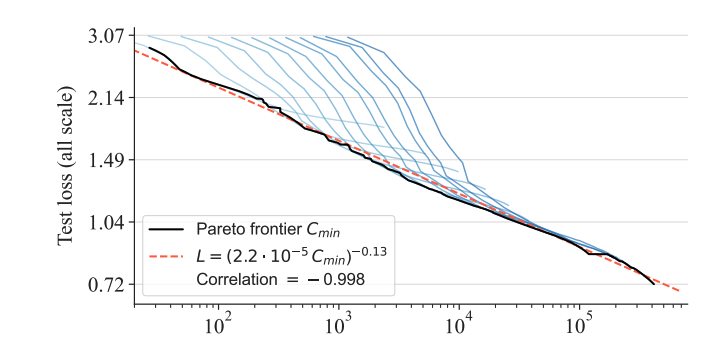

###  Autoregressive Models: Definition & Challenges

#### Definition
For a sequence of tokens $x = (x_1, x_2, ..., x_T)$, where $x_t \in [V]$:

$p(x_1, x_2, ..., x_T) = \prod_{t=1}^T p(x_t | x_1, x_2, ..., x_{t-1})$


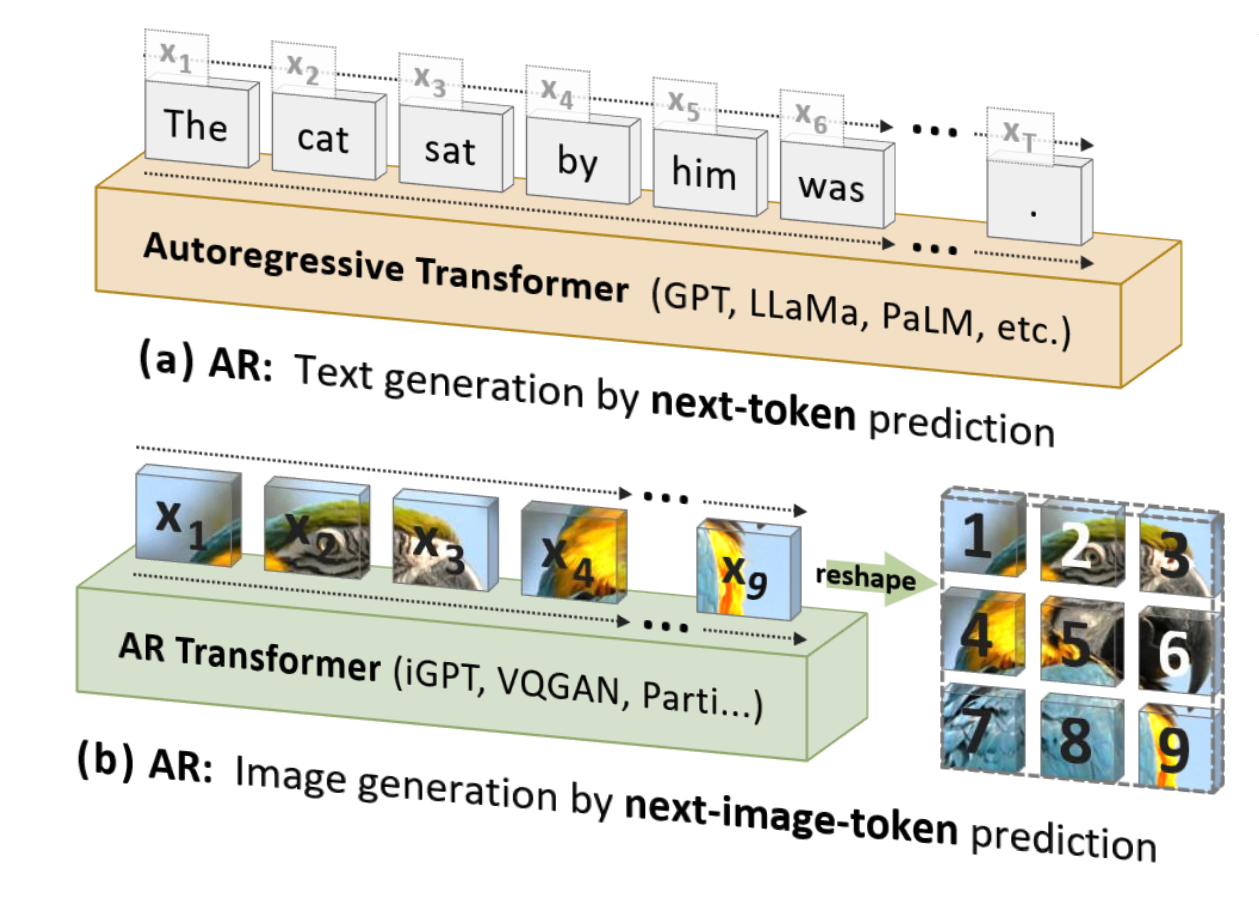  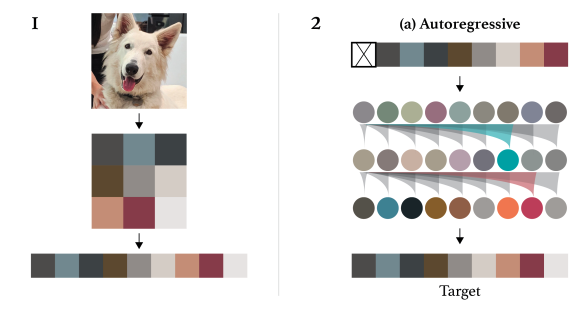 

#### Core Challenges

1. **Mathematical Inconsistency**:
   Given feature map $f \in \mathbb{R}^{h \times w \times C}$, VQVAE produces interdependent feature vectors $f_{(i,j)}$ while AR assumes $p(x_t)$ depends only on $(x_1,...,x_{t-1})$.

2. **Loss of Spatial Structure**:
   Flattening transforms $q \in [V]^{h \times w}$ into $x = (x_1,...,x_{h \times w})$, breaking spatial locality between $q_{(i,j)}$ and its neighbors $q_{(i\pm1,j)}, q_{(i,j\pm1)}$.

3. **Computational Burden**:
   For generating $n \times n$ tokens, requires $O(n^2)$ steps with $O(n^2)$ attention per step, totaling $\sum_{i=1}^{n^2} i^2 = \frac{n^2(n^2+1)(2n^2+1)}{6} = O(n^6)$ computations.

4. **Limited Generalization**:
   Given image region $R$, model can only predict $p(x_t|x_{<t}, R)$ in one direction, preventing bidirectional tasks like $p(x_{top}|x_{bottom})$ or $p(x_{left}|x_{right})$.

#### Solution Needed
→ A new approach that preserves spatial structure while maintaining autoregressive properties

# VAR Solutions: Reimagining Autoregression

## New Formulation: Next-Scale Prediction
Instead of token-by-token, predict entire resolution maps:

$p(r_1, r_2, ..., r_K) = \prod_{k=1}^K p(r_k | r_1, r_2, ..., r_{k-1})$

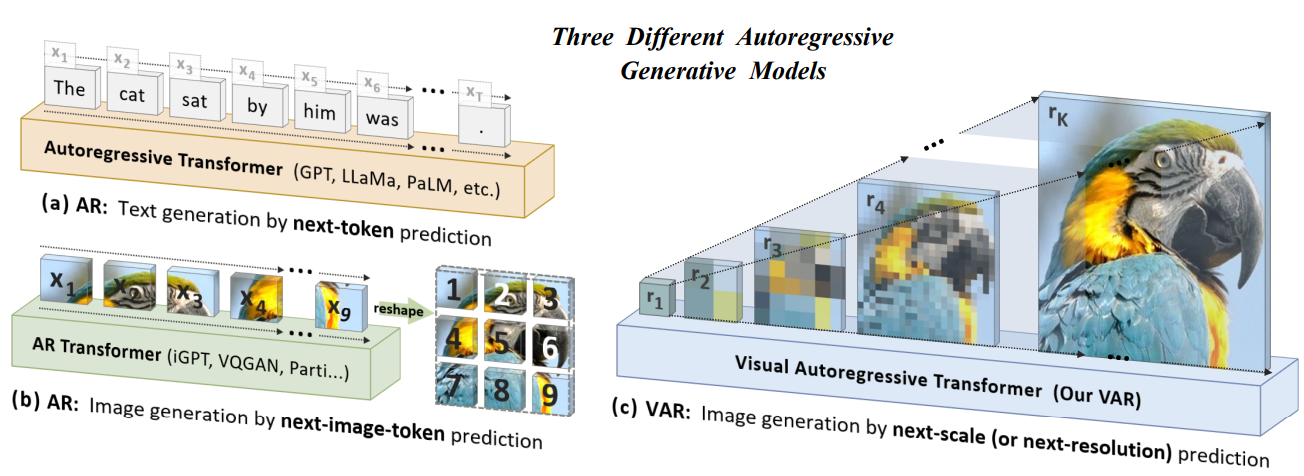

## VAR Architecture

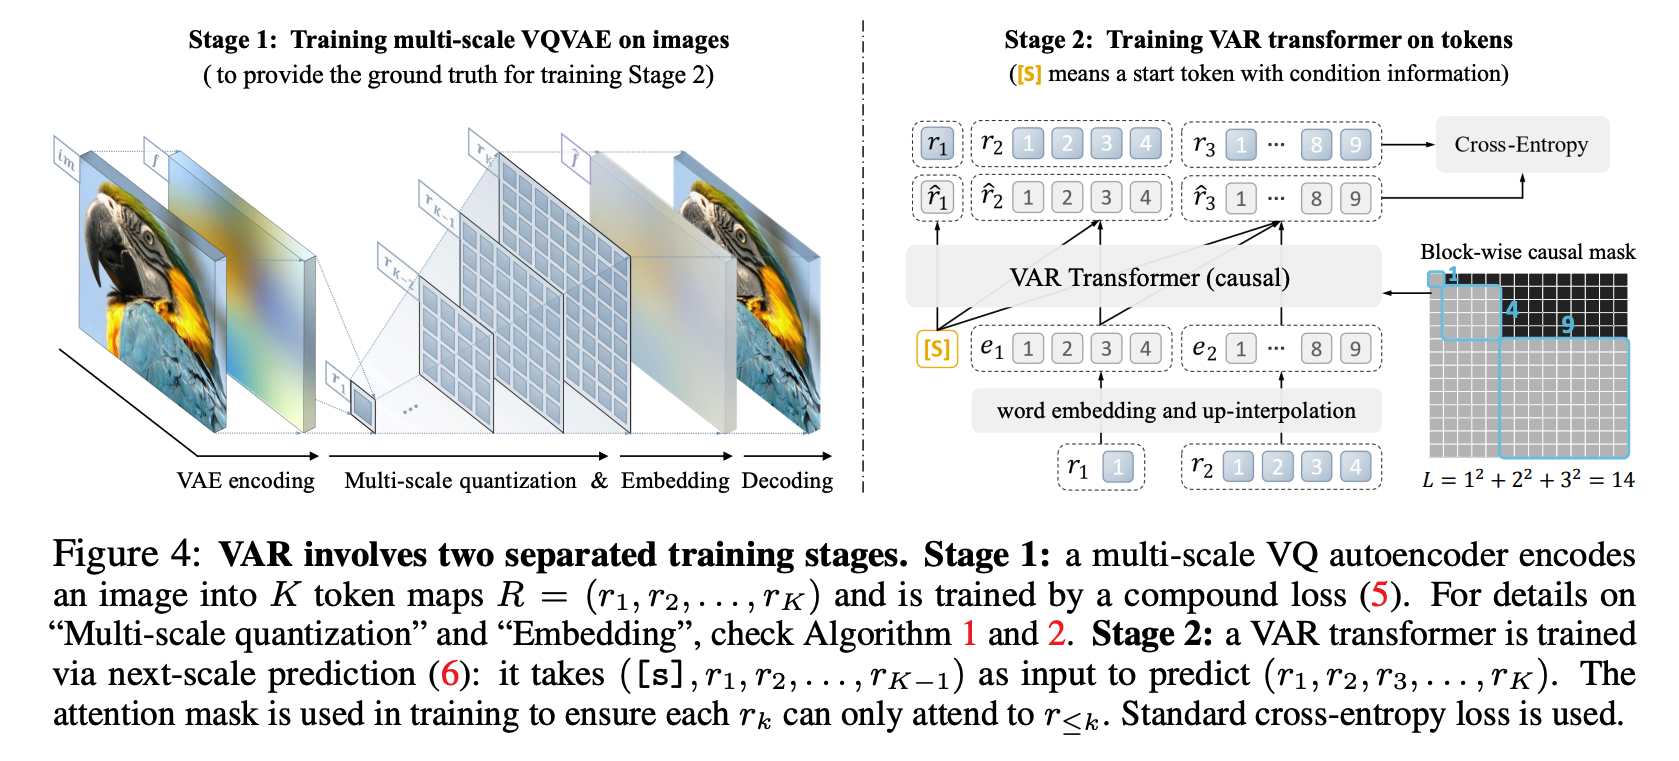

| Problem Solved | Solution |
|----------------|----------|
| **Mathematical Consistency** ✓ <br>- Each $r_k$ depends only on lower resolutions<br>- Aligns with natural coarse-to-fine progression<br>- $f_{k} = f_{k-1} - \phi_k(z_k)$ maintains proper dependencies | **Preserved Spatial Structure** ✓ <br>- No flattening operation<br>- Tokens in each $r_k$ fully correlated<br>- Multi-scale design reinforces spatial hierarchy |
| **Computational Efficiency** ✓ <br>- Reduced to $O(n^4)$ complexity<br>- Parallel generation within each scale<br>- ~20× faster than traditional AR | **Enhanced Generalization** ✓ <br>- Supports bidirectional reasoning<br>- Enables zero-shot editing tasks<br>- Natural handling of spatial relationships |

## Results: Breaking Performance Barriers

| Model Performance | Efficiency Metrics |
|------------------|-------------------|
| **Quality Metrics** <br>- FID: 1.73 (VAR) vs 2.10 (L-DiT-3B)<br>- IS: 350.2 (VAR) vs 304.4 (L-DiT-3B)<br>- Maintains comparable precision/recall | **Computational Gains** <br>- Parameters: 2.0B (VAR) vs 3.0B (DiT)<br>- Only O(log(n)) iterations vs O(n²)<br>- 20× faster than traditional AR |
| **Training Efficiency** <br>- 350 epochs vs DiT's 1400 epochs<br>- Better performance/parameter ratio<br>- Consistent improvement with scaling | **Inference Speed** <br>- DiT-XL/2 requires 45× more time<br>- Comparable to efficient GANs<br>- Parallel generation per scale |
| **Foundation Model Capabilities** <br>- Zero-shot image editing<br>- In-painting and out-painting<br>- Class-conditional image editing | **Scaling Properties** <br>- LLM-like scaling laws<br>- Strong correlation (≈-0.998)<br>- Generalizes to new tasks |

### Key Achievement
First autoregressive model that demonstrates both SOTA performance and foundation model properties: scaling laws and zero-shot generalization.

### 🏆 First AR Model to Beat Diffusion

# Latest Advances in Autoregressive Image Generation

| Paper | Description | Links |
|-------|-------------|-------|
| VAR: Visual Autoregressive Modeling (2024) | First proposed next-scale prediction for AR image generation. Key innovations:<br>- Multi-scale token prediction<br>- Coarse-to-fine generation<br>- $O(n^4)$ complexity vs $O(n^6)$ | [📄 Paper](https://arxiv.org/abs/2404.02905)<br>[💻 Code](https://github.com/FoundationVision/VAR)<br>[🎯 Demo](https://github.com/FoundationVision/VAR/blob/main/demo_sample.ipynb) |
| SWITTI: Scale-Wise Transformers (2024) | Built on VAR's foundation with key improvements:<br>- Non-causal architecture<br>- Better normalization strategy<br>- Selective use of classifier-free guidance<br>- ~7× faster than diffusion models | [📄 Paper](https://arxiv.org/abs/2412.01819)<br>[💻 Code](https://github.com/yandex-research/switti)<br>[🎯 Demo](https://yandex-research.github.io/switti) |
| HART: Hybrid Autoregressive Transformer (2024) | Combined AR with diffusion approaches:<br>- Lightweight model (0.7B params)<br>- Hybrid tokenization strategy<br>- Balance between quality and speed | [📄 Paper](https://arxiv.org/abs/2402.12517)<br>[💻 Code](https://github.com/mit-han-lab/hart)<br>[🎯 Demo](https://hart.mit.edu/) |
| LlamaGen: AR Model Beats Diffusion (2024) | Pure LLM architecture for image generation:<br>- Improved tokenizer (97% codebook usage)<br>- Native LLM optimizations (326-414% speedup)<br>- FID 2.18 on ImageNet with 3.1B params | [📄 Paper](https://arxiv.org/abs/2406.06525)<br>[💻 Code](https://github.com/FoundationVision/LlamaGen)<br>[🎯 Demo](https://peizesun.github.io/llamagen/) |

## Model Evolution
```mermaid
graph LR
   VQGAN[VQGAN: First AR] --> VAR[VAR: Next-Scale]
   VAR --> SWITTI[SWITTI: Non-Causal]
   VAR --> HART[HART: Hybrid AR-Diffusion]
   VAR --> LlamaGen[LlamaGen: Pure LLM]